# Lecture 5b Scribing -- Monte Carlo Method


## Objectives

 + Basic Monte Carlo method
 
 + Monte Carlo Integrals
 
 + Importance Sampling
 
 + Inverse Transform
 
 + Rejection Sampling
 
 + Stratified Sampling
 
 + Monte Carlo Analysis of Uncertainties in Measurement
 

## Basic Monte Carlo

 + Basically, the Monte Carlo method can be tought as a numerical method that generates random numbers to performe statistical sampling experiments and provide an approximate solution for which an analytical solution is not known.[1]
 
 
 + To understand the problem, here we show an example on how to use monte carlo method to estimate the area of a unit circle and estimate the valu of $\pi$
 
 
  
   1. We have a box with lenght = 2. Inside the box, we have a circle with r = 1.
   
   2. Generate random points inside the box.
   
   3. Therefore, the area of the circle can be represented by:
 
 $\frac{C}{N} = \frac{\pi * 1^2}{2^2} = \frac{\pi}{4}$
 
 C = Numer of points inside the circle
 
 N = Total number of points
 
 + The following code is used to demonstrate this example[2]

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set_style("white")

import time

import scipy.stats

Area of the circle =  3.1412
pi =  3.141592653589793


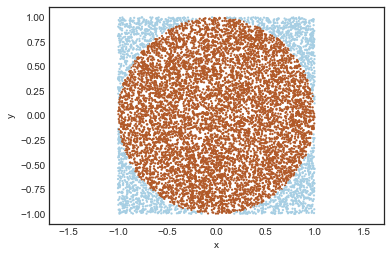

In [2]:
#area of the bounding box
box_area = 4.0    

#number of samples
N_total = 10000 

#drawing random points uniform between -1 and 1
X = np.random.uniform(-1,1,N_total)
Y = np.random.uniform(-1,1,N_total)

# calculate the distance of the points from the center 
distance = np.sqrt(X**2+Y**2);  
 
# check if point is inside the circle    
is_point_inside = distance<1.0

# sum up the hits inside the circle
N_inside=np.sum(is_point_inside)

# estimate the circle area
circle_area = box_area * N_inside/N_total

# some nice visualization
plt.scatter(X,Y, c=is_point_inside, s=5.0, edgecolors='none', cmap=plt.cm.Paired)  
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')

# text output
print("Area of the circle = ", circle_area)
print("pi = ", np.pi)

## Monte Carlo Integration


One of the most common use of Monte Carlo method is to calculate intergrals. In the following material, we will see how monte carlo can be easily used to calculate integrals.
 
**Now, let's look at the standard Monte Carlo integration method[3]:**

 + Suppose we need to calculate the intergral of function f(x):
 $ I = \int\limits_a^b f(x)dx$ 
 
 + By using  Monte Carlo method, we can simply generate N random numbers $x_i$, $i = 1,...,N$from a uniform distribution in the interval [a,b]

+ Then, the intergral $I$ can be calculated by:

$$I \approx \frac{b-a}{N} \sum_{i=1}^{N}f(x_i)$$

**In measurment, we also want to know what is the error of the estimator. Therefore, let's look at the standard error of MC integration.[3]**

+ First we define $<f> = \frac{1}{N}\sum_{i}f(x_i)$ and $<f^2> = \frac{1}{N}\sum_{i}f^2(x_i)$

+ If we use N samples to estimate the integral, the standard error will be:

$$ \sigma_N = V\sqrt \frac{<f^2> - <f>^2 }{N - 1}$$ where V is the integral interval. Besides, if we use $N$ instead of using $N-1$, we will underestimate the error. 

It is clearly that the more samples N we use, the more accurate the result is. Let's exam the MC integral method and the standard error through an example here:
 
  


**Example2 [3]:** Calculate the integral $ I = \int\limits_0^1 x^2 dx$
 
 ** We solve the problem by using Monte Carlo method:**
 
 1. We draw N random numbers from 0 to 1 by using uniform distributions.
 2. Plug the N numbers into the function $ f(x) = x^2 $
 3. Estimate the integral by Monte Carlo method
 4. We know the expected value is $1/3$.
 5. Let's use different value of N to see how the standard error changes.

In [3]:
def mcInte(a,b,N):
    X = np.random.uniform(low=a, high=b, size=N) # Sampling N random number in [a,b]
    Y = X**2 #The integral we need to calculate
    V = b-a  # The interval of the integral
    mcInt = V * np.sum(Y)/ N # Monte Carlo method
    
    #Calculate the standard error
    f = np.sum(Y) / N
    f2 = np.sum(np.square(Y)) / N
    std = V*np.sqrt((f2 - np.square(f))/(N-1))
    return mcInt,std

a = 0    
b = 1
N= [100,1000,10000,100000]

print("The exact result is:",1/3)
for n in N:
    mcInt,std = mcInte(a,b,n)
    print("N =",n, "Monte Carlo estimation=",mcInt, "Standard error=", std)



The exact result is: 0.3333333333333333
N = 100 Monte Carlo estimation= 0.352249708889 Standard error= 0.0312873359853
N = 1000 Monte Carlo estimation= 0.322810833176 Standard error= 0.00944555835776
N = 10000 Monte Carlo estimation= 0.335377993605 Standard error= 0.00298414716553
N = 100000 Monte Carlo estimation= 0.333105050592 Standard error= 0.000942353381198


It can be seen from the example2, when we increase the number of random samples N, the standard error is decreasing.

## Importance Sampling

The basic Monte Carlo integration method is an easy way to estimate the value of an integral. However, the accuracy the the basic method is not good enough for some distribuiton functions such that the distribution has a very large value on a small volum,but the value of the function is very small on dominant volume. For example, the function in the figure below.




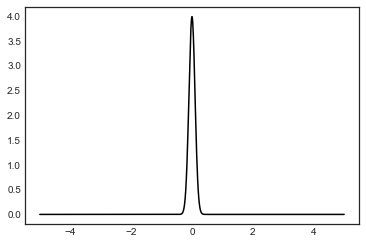

In [14]:
from scipy.stats import norm

#Draw the pdf of normal distribution N(0,0.1)
x = np.linspace(-5, 5, 1000)
dist = norm(0, 0.1)
plt.plot(x, dist.pdf(x), c='black')

From the figure we can see that the value are 0 at dominant volume but has peak value at the point around the interval [-0.2, 0.2]. If we draw samples evenly in the integration volume such as [-4,4], the small groups of points that close to the peak value give the dominant contribution to the integral[3]. 


Therefore, in aim to improve the accuracy of our estimation, we need to use another Monte Carlo method called **Importance Sampling**: We choose points according to their importance to the value of the integral, which means choose more points that are close to the 'peak'[4].




+ Suppose we want to calculate the integral:

$$I = \int \limits_a^b f(x)dx$$

+ Now, we propos a positive normalized weight function w(x) such that:

$$\int \limits_a^b w(x) dx = 1$$


+ Then, rewrite the integral as:
$$I = \int \limits_a^b \frac{f(x)}{w(x)}w(x) dx$$

+ Finally, the estimate of the integral is:

$$I = \frac{1}{N} \sum_{i=1}^{N}\frac{f(x_i)}{w(x_i)}$$ 


+ In practice, w(x) should be chosen as close as possible to f(x) in order to make f(x)/w(x) slowly varying.[4]  

Besides, since f(x)/w(x) is flatter than f(x), so for a given number of random samples N, the error of importance sampling is smaller than the basic method.[3] Therefore, the error of importance sampling can be calculated as:

+ We define g as:
$$g = \frac{f(x)}{w(x)}$$

+ Then, similar with MC integration, the error will be:

$$\sigma_N = \sqrt \frac{<g^2> - <g>^2 }{N - 1}$$


Here we look at an example show how to use importance sampling and the accuracy difference between importance sampling and the basic MC integration.[3]

**Example3**: Calculate the integral $I = \int \limits_0^1 x^{-1/3}+ x/10  dx$ [3]

+ Let's first draw the figure of the function $f(x) = x^{-1/3}+ x/10$

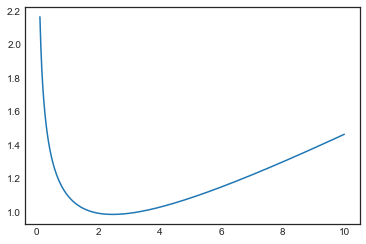

In [19]:
x = np.linspace(0.1, 10, 1000)
dist = x**(-1/3) + (x/10)

plt.plot(x, dist)

+ From the figure we can see, when x is very small, such as in the interval [0,1], the function is pretty much like $x^{-1/3}$. So we set $w(x) = C*x^{-1/3}$


+ Therefore, we can calculate the value of constance C as: $\int \limits_0^1 Cx^{-1/3} dx = 1$. So $C = 2/3$

+ Then the cumulative distribution function F(x) will be: $F(x) = \int\limits_0^x 2/3 x^{-1/3} dx = x^{2/3} = y$. 

+ Where y is from a flat distribtuion in the interval [0,1] and $x = y^{3/2}$ is from distribution function $p(x) = 2/3 x^{-1/3}$


+ Therefore, the process of importance sampling now are: First,generate N random numbers $y_i$ from uniform distributon. Then,calculate the value of $x_i$ by $x_i = y_i ^{3/2}$. Finally, calculate the average of $g_i = f(x_i)/w(x_i)$

Before we implementing the importance sampling in python, let's first calculate the exact integral value and the error:

+ $I = \int \limits_0^1 x^{-1/3}+ x/10 dx = 31/20 = 1.55$

+ By using basic MC integration method, the error is: $\sqrt \frac{<f^2> - <f>^2 }{N - 1} \approx \frac{0.85}{\sqrt{N - 1}}$

+ By using Importance Sampling, the error is: $\sqrt \frac{<g^2> - <g>^2 }{N - 1} \approx \frac{0.045}{\sqrt{N - 1}}$, which is much more accurate than basic MC integration.

The following code is used to estimate the integral by using both basic MC integration and Importance Sampling. Besides, the random samples used in both method are drawn to show how impartance sampling method choose the random samples.

The exact result is: 1.55
Basic MC integration: N = 100 Monte Carlo estimation= 1.48989074091 Standard error= 0.0529004883395
Basic MC integration: N = 1000 Monte Carlo estimation= 1.55367821458 Standard error= 0.023430059264
Basic MC integration: N = 10000 Monte Carlo estimation= 1.55092381988 Standard error= 0.00758138050165
Basic MC integration: N = 100000 Monte Carlo estimation= 1.54704431741 Standard error= 0.0026678930855
Importance Sampling: N = 100 Monte Carlo estimation= 1.54745391159 Standard error= 0.00459824279429
Importance Sampling: N = 1000 Monte Carlo estimation= 1.55197342972 Standard error= 0.00142322401453
Importance Sampling: N = 10000 Monte Carlo estimation= 1.550847042 Standard error= 0.000448852278054
Importance Sampling: N = 100000 Monte Carlo estimation= 1.54990102378 Standard error= 0.000141420835926


Text(0.5,1,'Samples of Importance Sampling')

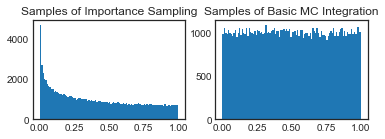

In [31]:
# The basic MC integration method
def mcInte(a,b,N):
    X = np.random.uniform(low=a, high=b, size=N) # Sampling N random number in [a,b]
    Y = X**(-1/3) + (X/10) #The integral we need to calculate
    V = b-a  # The interval of the integral
    mcInt = V * np.sum(Y)/ N # Monte Carlo method
    
    #Calculate the standard error
    f = np.sum(Y) / N
    f2 = np.sum(np.square(Y)) / N
    std1 = V*np.sqrt((f2 - np.square(f))/(N-1))
    return mcInt,std1

# The Importance Sampling method
def importanceSampling(a,b,N):
    y = np.random.uniform(low=a, high=b, size=N)
    x = y**(3/2)
    fx = x**(-1/3) + (x/10)
    wx = (2*x**(-1/3))/3
    gx = fx/wx
    ISint = np.sum(gx)/ N
    
    g = np.sum(gx) / N
    g2 = np.sum(np.square(gx)) / N
    std2 = np.sqrt((g2 - np.square(g))/(N-1))
    return ISint,std2

a = 0    
b = 1
N= [100,1000,10000,100000]

print("The exact result is:",1.55)

for n in N:
    mcInt,std1 = mcInte(a,b,n)
    print("Basic MC integration: N =",n, "Monte Carlo estimation=",mcInt, "Standard error=", std1)

    
for n in N:
    ISint,std2 = importanceSampling(a,b,n)
    print("Importance Sampling: N =",n, "Monte Carlo estimation=",ISint, "Standard error=", std2)


# We draw the samples used in basic MC integration and Importance sampling to see the difference.
n = 100000
x_basic = np.random.uniform(low=0, high=1, size=n)
x_is = x_basic**(3/2)

plt.subplot(222)
plt.hist(x_basic,bins=100)
plt.title('Samples of Basic MC Integration')

plt.subplot(221)
plt.hist(x_is,bins=100)
plt.title('Samples of Importance Sampling')

The results of Example3 indicate that:

+ For a given number of random samples N, importance sampling is much more accurate than the basic MC integration method.

+ The importance sampling will generate more samples which have more contributions to the integtal. As shown in the figure above, we can see most of the samples are around 0, where the function f(x) has the peak.

## The Inverse Transform

In the previous two sections, we draw random samples from uniform distribution to do the monte carlo integration. What if we want to draw random samples from non-uniform distributions?  

There are mainly two ways to do this, which are ** Inverse Transform** and ** Rejection Sampling**. We will introduce Inverse Transform in this section and talk about Rejection Sampling in the next section.

Before disscusing about the inverse transform, we have to get familiar with CDF. In the previous lectures, we have learnt that the CDF $F(X)$(Cumulative Distribution Function) can determine the distribution of a random variable,which has the following property:

$$\int \limits_{-\infty}^{\infty} F(x) dx= 1$$


Now let's define the Inverse Transform[5]:

+ We first define the inverse cdf of the cdf function $F(x)$ as,which is also called generalized inverse or quantile function:

$$F^{-1}(y) = inf\{x: F(x)\geq y\}$$


+ Now, we can say: If a cdf F(X) is invertable and has the inverse function $F^{-1}(U)$ where $U \sim U(0,1)$, then $X = F^{-1}(U)$ is a random variable with cdf F.


+ It can be easily proofed that: 
$$P(F^{-1}(u) \leq x) = P(U \leq F(x)) = F(x)$$


Therefore, the general process of inverse transform can be concluded as:

1. Generate a random sample u from uniform distribution U(0,1).

2. Then we calculate x by $x = F^{-1}(u)$.

3. Repeate the previous 2 steps N times to generate N random samples which has the cdf F.




Now,we show an example here on how to use inverse transform to draw random samples from Bernouli distribution.[5]


**Example4:** Draw N random samples from Bernouli distribution with probability $p \in (0,1)$

+ The cdf of Bernouli distribution is:
$$  F(x) =
  \begin{cases}
    1-p       & \quad \text{If } 0\leq x \leq 1\\
    1  & \quad \text{If } x \geq 1
  \end{cases}
$$


+ Therefore, the inverse of F(x) is:

$$  F^{-1}(u) =
  \begin{cases}
    0       & \quad \text{If }  u \leq 1-p\\
    1  & \quad \text{If } u  > 1-p
  \end{cases}
$$

Text(0.5,1,'Random Samples of Bernouli Distribution')

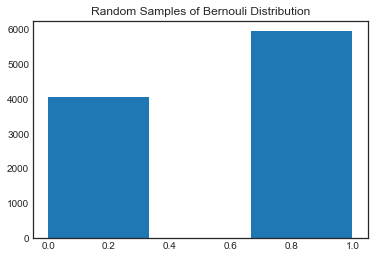

In [42]:
#Define the inverse of F
def inverseCdf(u,p):
    if u <= 1-p:
        x = 0
    else:
        x = 1
    return x

#Generate N random samples from Bernouli(p)
N = 10000
X = []
for n in range(0,N):
    u = np.random.uniform(low=0, high=1, size=1)
    x = inverseCdf(u,0.6)
    X.append(x)

plt.hist(X,bins=3)
plt.title('Random Samples of Bernouli Distribution')

## Rejection Sampling

In the previous section, we talked about how to use Importance sampling to sample from a non-uniform distribution. In this section, we are going to introduce another method the **Rejection Sampling**, which can be used to draw random samples for a given distribtution.

Suppose we need to draw random samples from a distribution with pdf(probability density function) $f$ by using rejection sampling. The basic idea of rejection sampling is[5]:

+ We sample from another distribution with pdf $g$, which is easy to sample from.

+ We only accept some of these samples from g which depends on a Bernoulli experiment.

Specifically, the rejection sampling method can be concluded as:

1. We draw random samples $\bar{x}$from another distribution with pdf $g$,which is easy to sample from.

2. We obtaion random samples from uniform distribution $u \sim U(0,1)$.

3. We define a constant $c$ such that $cg(x) \geq f(x)$ for all the $x$.

4. If $u \leq \frac{f(\bar{x})}{cg(\bar{x})}$, then accept the sample.

5. It is clearly the acceptance-rejection ratio is $\frac{1}{c}$

If we could sample a random vector(X,U) uniformly from the region under the graph of $f$, then $X \sim f$.[5] That is the reason why rejection sampling works. In practice, we want the value of $c$ as small as possible, in aim to improve the acceptance-rejection ratio and also decreasing the running time.

Let's look at an example on how to use rejection sampling[6]

**Example5**: Draw random samples from the half-normal distribution $f(x) = \sqrt{\frac{2}{\pi}}exp(-\frac{x^2}{2})$, $x \geq 0$

+ By using rejection sampling method, we choose our $g(x) = exp(-x)$, $x \geq 0$, which is the exponentially distribution.

+ We define the constant value $c = \sqrt{\frac{2}{\pi}}exp(\frac{1}{2}) \approx 1.3155$

+ Let's first draw the frigure of the two distribution $cg(x)$ and $f(x)$.

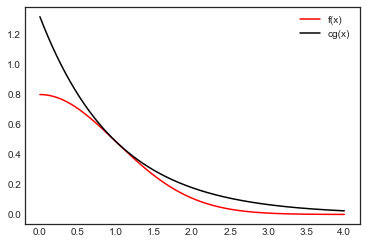

In [45]:
#Define the pdf f(x), g(x) and the constant c
c = np.sqrt(2/3.1415926)*np.exp(1/2)
f = lambda x: np.sqrt(2/3.1415926)*np.exp((-x**2)/2)
cg = lambda x: c*np.exp(-x)

#Draw the figure of these two function from 0 to 4.
x = np.linspace(0, 4, 1000)
plt.plot(x, f(x), c='r',label=u'f(x)')
plt.plot(x, cg(x), c='k',label=u'cg(x)')
plt.legend()

From the figure above, we can see that the condition that $cg(x) \geq f(x)$ holds for all $x$. It means we can use $cg(x)$ for the rejection sampling of $f(x)$, which is implemented in the following code.

Total number of samples:  65897 Accepted samples:  50000


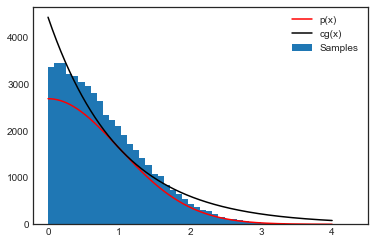

In [48]:
#Number of samples we want to have
N = 50000
#the number of accepted samples
accepted = 0
#the total number of samples created
total = 0
samples = np.zeros(N)

while (accepted < N):
    #draw x from g(x)
    x = np.random.exponential()
    #draw u from uniform
    u = np.random.uniform(0,1)
    if u <= (f(x)/cg(x)):
        samples[accepted] = x
        accepted += 1
        
    total += 1

print("Total number of samples: ", total, "Accepted samples: ", accepted)

# get the histogram info
hinfo = np.histogram(samples,50)

# plot the figure
plt.hist(samples,bins=50, label=u'Samples');

xvals = np.linspace(0, 4, 1000)
plt.plot(xvals, hinfo[0][0]*f(xvals), 'r', label=u'p(x)')
plt.plot(xvals, hinfo[0][0]*cg(xvals), 'k', label=u'cg(x)')
plt.legend()

## Stratified Sampling

 + Stratified Sampling is a widely used sampling method in statistic, the basic idea is to divide the whole population into small non-overlapping groups.
 
 
 + The Monte Carlo Stratified Sampling is similar with the Monte Carlo method used to calculate the integral. However, we need to divide the whole domain into some number of disjoint subsets. Then do the integral method for each group and add them up.
 
 
 + Instead of spreading the sample evenly across the whole region S, we are able to get more samples for each small group and have more variablility to the estimator.
 
 **The process can be described as following:[7]**
 
 
 1. Suppose we need to calculate
 $$ \theta = E(g(x)) = \int g(x)f(x) dx$$
 
 2. We divide the domain of interest S into N disjoint groups $S_i$ and i = 1,2...,N
 
 3. Therefore, for i = 1,2,...,N we have:
 $$\theta = \int_{S} g(x)f(x)dx = \sum_{i=1}^{N} \int_{S_i} g(x)f(x)dx = \sum_{i=1}^{N}\theta_i$$
 
 4. Finally, the estimator of $\theta$ will be:
 $$\hat{\theta}  = \sum_{i=1}^{N} \hat{\theta_i}$$ where the $\hat{\theta_i}$ can be computed by the Monte Carlo Integrals we discussed at the begining of the scribing
 
 
 
 Example7: Calculate the  integral $ I = \int\limits_2^3 x^2 + 4x\sin(x) dx$ using Stratified Sampling. We can see that ** the result calculated by Stratified Sampling is more accurate than the simple method**

In [52]:
#We define the f(x) function
def f(x):
    return x**2 + 4*x*np.sin(x) 

#We define the integration of f(x)
def intf(x): 
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x)

#Define the entire domain
a = 2
b = 3

#We divide the whole domain into 4 parts
V = 0.25
A = [2.0,2.25,2.5,2.75]
B = [2.25,2.5,2.75,3.0]

# use N draws and for each group we have N/4 draws 
N= 10000
Ni = int(N/4)
MC = 0.0

#Calculate the estimator 
for i in range(0,4):
    x = np.random.uniform(low=A[i], high=B[i], size=Ni)
    y = f(x)
    mc_i = V * np.sum(y)/ Ni
    MC = MC + mc_i
    

exactval=intf(b)-intf(a)

##Basic MC integration
def mcInte(a,b,N):
    X = np.random.uniform(low=a, high=b, size=N) # Sampling N random number in [a,b]
    Y = X**2 + 4*X*np.sin(X) #The integral we need to calculate
    V = b-a  # The interval of the integral
    mcInt = V * np.sum(Y)/ N # Monte Carlo method
    return mcInt

mcInt = mcInte(a,b,N)

print("Exact number=", intf(b)-intf(a))
print("Basic Monte Carlo integration =",mcInt )
print("Stratified Sampling = ",MC)

Exact number= 11.8113589251
Basic Monte Carlo integration = 11.808190467
Stratified Sampling =  11.812751682


## Monte Carlo Analysis of Uncertainties in Measurement

After introducing several Monte Carlo methods for both sampling and calculating the integral, we look at how we can use Monte Carlo to analize the unvertainties in measurement. The following materials are refering to the paper by Alan and Robert[8].

+ As we all know, the measurements that we do many times do not repeat exactly, for each measurement, there is a random component. 


+ Actually, we can use Monte Carlo method to model the randomness in the measurement process.


+ Then, we can use this generated model to creat pseudo-measurements which incorporate the modeled randomness.

+ According to the previous sections, we can easliy understand that it's very easy to use Monte Carlo simulations to combine the uncertainties:

  1. We use the pseudo-random generators to model the uncertainties of the input quantities.
  
  2. Then, we use the measurement equation to model the calculation of the output quantity from the input quantities.
  
  3. Finally, we can generate a pseudo-random input quantities, then calculate its output quantity.
  
  4. By doing the step3 for N times, we can increment a histogram bin-repeat loop. Commanly we do it over $10^5$ times.
  
 
Here, we look at an example on measurement comparisons to illustrate the power of Monte Carlo simulation.[8]

**Example8**:  Monte Carlo analysis of uncertainties in measurement with Gaussian PDF noise.

Symbol used in this example:

+ $i$ - Index to indicate Laboratory i in an M-Lab.

+ $ix_0$ - Mean value reported by lab i

+ $iu$ - The uncertainty reported by lab i

+ $\bar{x_j}$ - Simple mean of the M values for the M-lab in event j.

+ M - Number of labs in a comparison and its simulated comparison.

The example is based on interlaboratory measurement comparisons that circulate a stable artefact to be measured by a group of 6 laboratories, aiming to provide confidence in the claimed measurement capabilities by demonstrating consistency.

The table below shows the reported mean and uncertainty(standard deviation) of each lab:

| Lab $i$ | $ix_0$   |$iu$|
|------ |------|------|
| Lab 1 |0.335 |0.335 |
| Lab 2 |-0.251| 0.251|
| Lab 3 |-0.262| 0.393|
| Lab 4 |-0.271| 0.575|
| Lab 5 | 0.640| 0.640|
| Lab 6 |-0.471| 0.270|

Let's first draw the error bars diagram for each lab i.

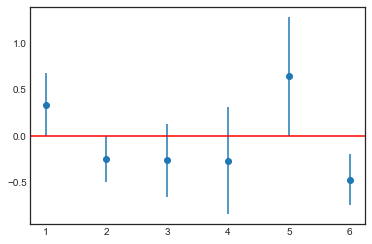

In [55]:
i = [1,2,3,4,5,6]
y = [0.335,-0.251,-0.262,-0.271,0.640,-0.471]
yerror = [0.335,0.251,0.393,0.575,0.640,0.270]

plt.errorbar(i, y, yerr=yerror, fmt='o')
plt.axhline(y=0, color='r', linestyle='-')

For each lab i they reported a mean $ix_0$ and a standard deviation $iu$. Therefore, we can treat each measurement as guassian distribution. Now, let's draw $10^5$ samples from each gaussian distribution and draw the simulated figure. 

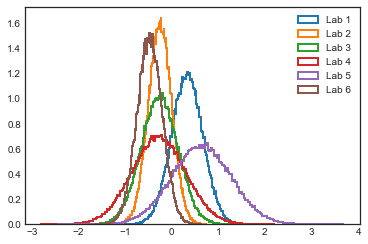

In [73]:
N = 10**5
g1 = np.random.normal(0.335,0.335,N)
g2 = np.random.normal(-0.251,0.251,N)
g3 = np.random.normal(-0.262,0.393,N)
g4 = np.random.normal(-0.271,0.575,N)
g5 = np.random.normal(0.640,0.640,N)
g6 = np.random.normal(-0.471,0.270,N)

plt.hist(g1, bins=200,  histtype='step', lw=2,normed = 'true',label=u'Lab 1')
plt.hist(g2, bins=200,  histtype='step', lw=2,normed = 'true',label=u'Lab 2')
plt.hist(g3, bins=200,  histtype='step', lw=2,normed = 'true',label=u'Lab 3')
plt.hist(g4, bins=200,  histtype='step', lw=2,normed = 'true',label=u'Lab 4')
plt.hist(g5, bins=200,  histtype='step', lw=2,normed = 'true',label=u'Lab 5')
plt.hist(g6, bins=200,  histtype='step', lw=2,normed = 'true',label=u'Lab 6')
plt.legend()
plt.show()


Now, we can use the simulated data to calculate our measurement equations,which are simple mean $\bar{x_j}$ and the standard deviation $\sigma_j$:

$$ \bar{x_j} = \frac{1}{M}\sum_{i=1}^{M} ix_j$$
$$\sigma_j = \sqrt{\frac{1}{M}/\sum_{i=1}^{M} i\sigma^2}$$

The figure of the corresponding gaussian distribution is shown below: 

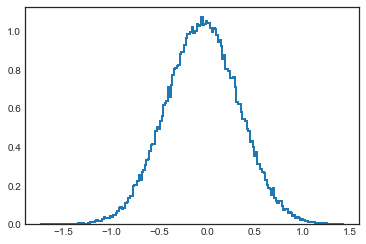

In [89]:
xj = (np.mean(g1)+np.mean(g2)+np.mean(g3)+np.mean(g4)+np.mean(g5)+np.mean(g6))/6
sigma = np.sqrt(1/(6*(np.var(g1)+np.var(g2)+np.var(g3)+np.var(g4)+np.var(g5)+np.var(g6))))

g = np.random.normal(xj,sigma,N)
plt.hist(g, bins=200,  histtype='step', lw=2,normed = 'true')
plt.show()

### References:





[1] Jonathan P,Monte Carlo Method, http://reflect.otago.ac.nz/cosc453/student_tutorials/monte_carlo.pdf[Accessed February 19, 2018]


[2] AM207 https://am207.github.io/2017/lectures/lecture4.html [Accessed January 24, 2018]


[3] Kari P,Monte Carlo simulation methods,Part 1: Monte Carlo integration and random numbers,2008,http://www.helsinki.fi/~rummukai/lectures/montecarlo_oulu/lectures/mc_notes1.pdf. [Accessed February 19, 2018]


[4] Riku L, Computational Science, LECTURE 9 Monte Carlo Methods I,Aalto University. http://www.lce.hut.fi/teaching/S-114.1100/lect_9.pdf [Accessed February 19, 2018]


[5] Tim B, Methods of Monte Carlo Simulation,Chapter 3 Non-Uniform Random Variable Generation,Ulm University,2015. https://www.uni-ulm.de/fileadmin/website_uni_ulm/mawi.inst.110/lehre/ws15/MonteCarloMethods/Lecture_Notes.pdf [Accessed February 20, 2018]

[6] Bernard D, Acceptance-Rejection Sampling Made Easy,SIAM Review, Vol 32, No.3,pp 474-476,1990.http://web.tecnico.ulisboa.pt/~mcasquilho/CD_Casquilho/MC_Flury_ar.pdf [Accessed February 20, 2018]

[7] Marasinghe, Mervyn G, Statistics 580,Iowa State University http://www.public.iastate.edu/~mervyn/stat580/Notes/s09mc.pdf [Accessed January 24, 2018]

[8] Alan G.S, Robert J.D,Monte Carlo Modeling of Randomness,Data Modeling for Metrology and Testing 329 in Measurement Science,Institute for National Measurement,2009